# Black Friday Sale
This notebook contain the sale prediction of the company called ABC company. The company wants to create the machine learning model to predict and understand the customer purchase behaviour.

For this problem, we follow up some steps to keep ourself on the track.
1. Problem Statement
2. Understand the Data
3. Feature Engineering
4. Modeling
5. Experimentation

## 1. Problem Statement
A retail company `ABC Private Limited` wants to understand the customer purchase behaviour against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics, product details and Total purchase amount from last month.

## 2. Understand the Data
* **User_ID**	User ID
* **Product_ID**	Product ID
* **Gender**	Sex of User
* **Age**	Age in bins
* **Occupation**	Occupation (Masked)
* **City_Category**	Category of the City (A,B,C)
* **Stay_In_Current_City_Years**	Number of years stay in current city
* **Marital_Status**	Marital Status
* **Product_Category_1**	Product Category (Masked)
* **Product_Category_2**	Product may belongs to other category also (Masked)
* **Product_Category_3**	Product may belongs to other category also (Masked)
* **Purchase**	Purchase Amount (Target Variable)

## 3. Data Evaluation

In this section we perform the feature engineering to manipulate the data and understand it more better. We fill out the missing value in this section and turns the data into numerical values.

In [1]:
PATH = './data'
IMG_PATH = './image'

In [2]:
train_path = PATH + "/train.csv"
test_path = PATH + "/test.csv"

In [4]:
!pip install missingno

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import missingno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
plt.style.use('seaborn-whitegrid')

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, make_scorer_scorer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [6]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
len(train)

550068

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


Check out the missing values and plot that values as a graph and visualize it.

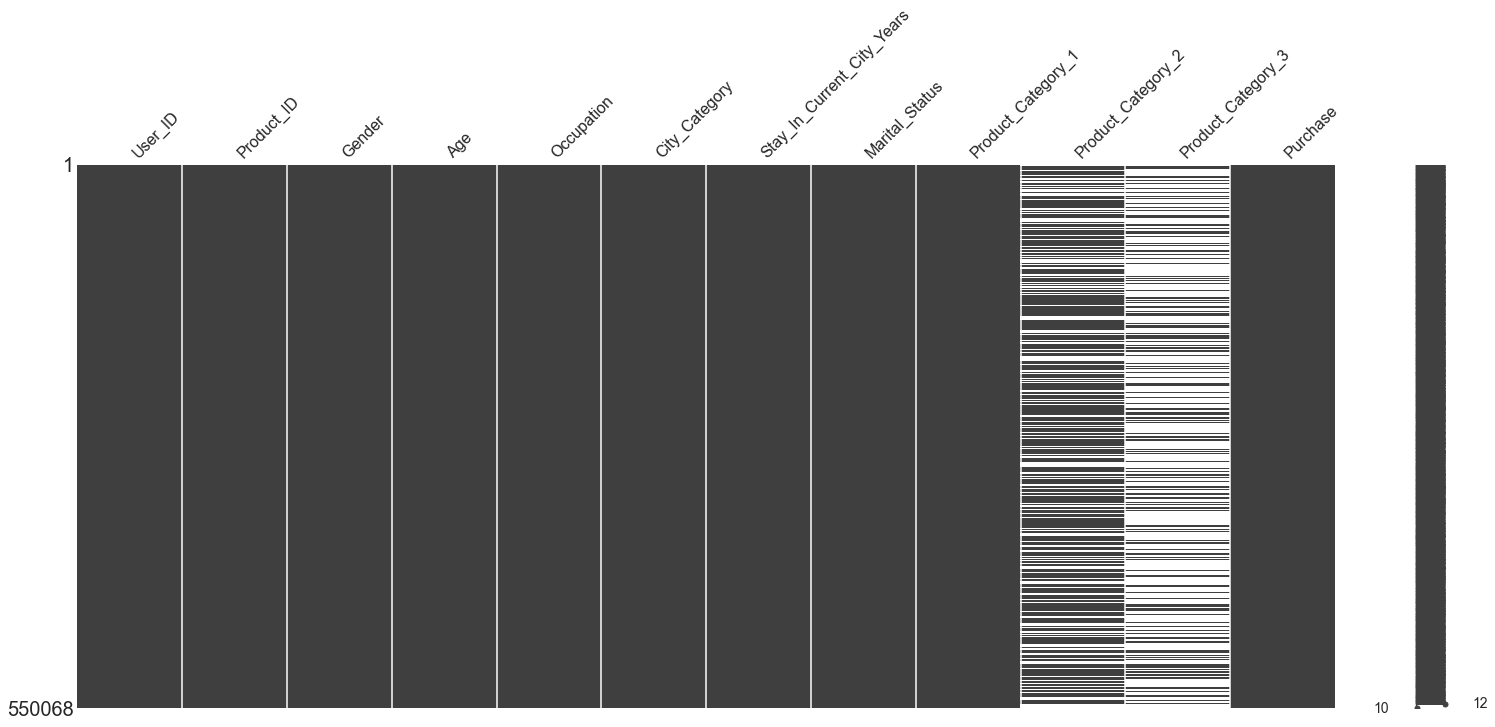

In [12]:
fig = missingno.matrix(train);
fig_save = fig.get_figure()
fig_save.savefig(IMG_PATH + '/missingno_matrix.png')

In [13]:
train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Since we have a lots of missing value in the `Product_Category_2` and `Product_Category_3` so we remove these value from the dataset.

In [14]:
train = train.drop(['Product_Category_2', 'Product_Category_3'], axis=1)
test = test.drop(['Product_Category_2', 'Product_Category_3'], axis=1)

We prepare our data for training the machine learning model. Lets save the dataset and perform the data evaluation on the data that we have created.

In [15]:
train.to_csv(PATH+'/train_updated.csv', index=False)
test.to_csv(PATH+'/test_updated.csv', index=False)

In [16]:
train_df = pd.read_csv(PATH+'/train_updated.csv')
test_df = pd.read_csv(PATH+'/test_updated.csv')

In [17]:
len(pd.get_dummies(train_df).columns), len(pd.get_dummies(test_df).columns)

(3653, 3512)

In [18]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Data Evaluation
Lets perform the Data Evaluation to understand the data and know which features are highly important for the target variable.

Gender Evaluation 

**Description:** Sex of User


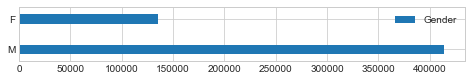

In [19]:
pd.DataFrame(train_df.Gender.value_counts()).plot(kind='barh', width=0.3, figsize=(8, 1));


So we see that we have more number of male customer involving in the Black Friday Sale.

Age Evaluation

**Description:** Age in bins

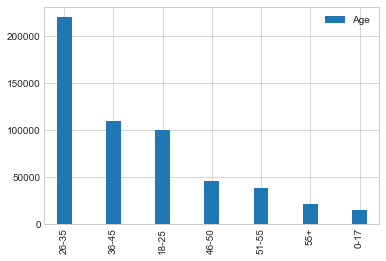

In [20]:
pd.DataFrame(train_df.Age.value_counts()).plot(kind="bar", width=0.3);

So, we have a more number of customer lies in the age group of 26 to 35 years old that are taking intrest in the sale.

Ocupation Evaluation

**Description:** Occupation (Masked)

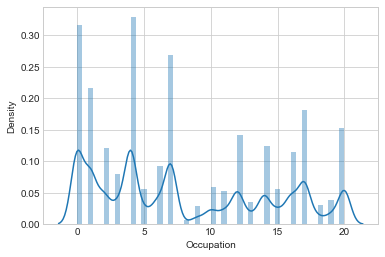

In [21]:
sns.distplot(train_df.Occupation);

As we see that occupation label with the value 4 have the highest number of density. Till now we dont know the meaning of this number as this is not mention in the competition desription.

City Evaluation

**Description:** Category of the City (A,B,C)

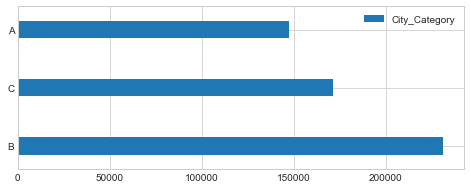

In [22]:
pd.DataFrame(train_df.City_Category.value_counts()).plot(kind='barh', width=0.3, figsize=(8, 3));

So, City with B value have the maximum number of customer belonging to that are purchasing the products from the Black Friday Sale.

Marital Status Evaluation

**Description:** Marital Status

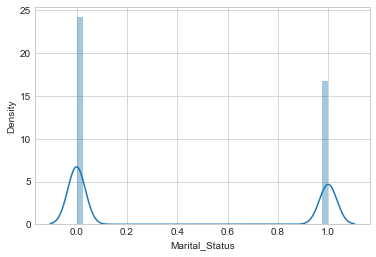

In [23]:
sns.distplot(train_df.Marital_Status);

So, most of the customer not married (assume by us) are involving in the sale.

Product Category 1 Evaluation

**Description:** Product Category (Masked)

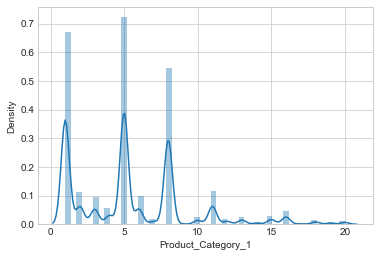

In [24]:
sns.distplot(train_df.Product_Category_1);

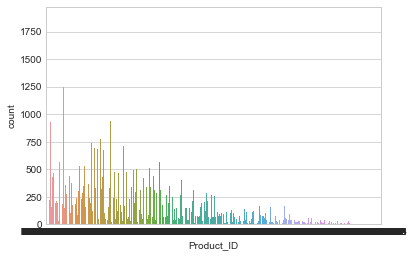

In [25]:
sns.countplot(train_df.Product_ID);

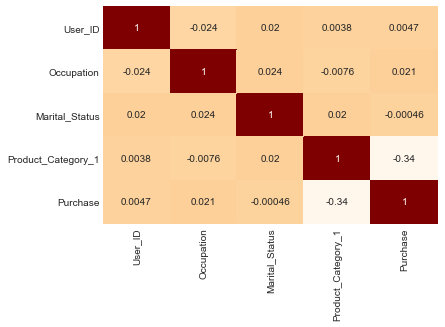

In [26]:
sns.heatmap(train_df.corr(), annot=True, cbar=False, cmap='OrRd');

Lets plot the graph between all the positive value and understand the realtion between them.

Plot the graph between the `Purchase` and the `Occupation` labels.

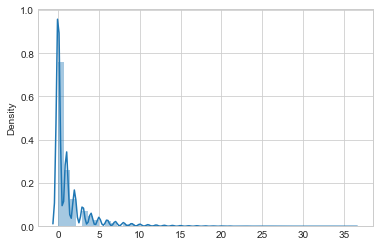

In [27]:
sns.distplot(pd.crosstab(train_df.Purchase, train_df.Occupation));

Now plot the graph between the `Marital Status` and the `Occupation` and see the realtion between them.

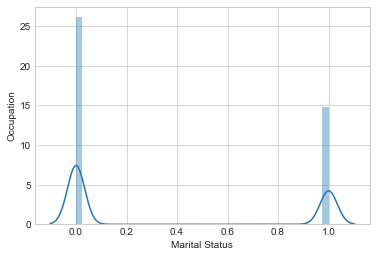

In [28]:
sns.distplot(pd.DataFrame(train_df['Marital_Status'], train_df['Occupation']));
plt.xlabel('Marital Status')
plt.ylabel('Occupation');

## 4. Feature Engineering
In this section we manipulate the data and convert the categorical data into numerical data.

In [51]:
# Convert the Gender label to numerical values
gender = pd.get_dummies(train_df.Gender)
train_df['Gender_F'] = gender.F
train_df['Gender_M'] = gender.M

In [54]:
# remove the Gender label from the dataset
train_df.drop('Gender', axis=1, inplace=True)

In [59]:
# Convert the Age label to numerical values

# create a dictonary containing the key as a unique value of age label and value as a number
age_mapping = {
    "0-17": 1,
    "55+": 2,
    "26-35": 3,
    "46-50": 4,
    "51-55": 5,
    "36-45": 6,
    "18-25": 7
}

# map the above dictonary to the original dataset
train_df.Age = train_df.Age.map(age_mapping)

In [65]:
# Convert the City Category to numerical values

# create a dictonary containing the key as a unique value of city category label and value as a number
city_mapping = {
    "A": 1,
    "B": 2,
    "C": 3
}

# map the above dictonary to the original dataset
train_df.City_Category = train_df.City_Category.map(city_mapping)

In [69]:
# Convert the City Category to numerical values

# create a dictonary containing the key as a unique value of stay_in_current_city_years label and value as a number
current_mapping = {
    "2": 1,
    "4+": 2,
    "3": 3,
    "1": 4,
    "0": 5
}
# map the above dictonary to the original dataset
train_df.Stay_In_Current_City_Years = train_df.Stay_In_Current_City_Years.map(current_mapping)

In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Age                         550068 non-null  int64 
 3   Occupation                  550068 non-null  int64 
 4   City_Category               550068 non-null  int64 
 5   Stay_In_Current_City_Years  550068 non-null  int64 
 6   Marital_Status              550068 non-null  int64 
 7   Product_Category_1          550068 non-null  int64 
 8   Purchase                    550068 non-null  int64 
 9   Gender_F                    550068 non-null  uint8 
 10  Gender_M                    550068 non-null  uint8 
dtypes: int64(8), object(1), uint8(2)
memory usage: 38.8+ MB


In [80]:
label_encoder = LabelEncoder()
train_df.Product_ID = label_encoder.fit_transform(train_df.Product_ID.values)

So, we have converted all our values to numerical data and we don't have missing value in our dataset. Lets save this dataset and train our machine learning model.

In [83]:
train_df.to_csv('train_numerical.csv', index=False)

In [4]:
train = pd.read_csv('./data/train_numerical.csv')
train.head()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Gender_F,Gender_M
0,1000001,672,1,10,1,1,0,3,8370,1,0
1,1000001,2376,1,10,1,1,0,1,15200,1,0
2,1000001,852,1,10,1,1,0,12,1422,1,0
3,1000001,828,1,10,1,1,0,12,1057,1,0
4,1000002,2734,2,16,3,2,0,8,7969,0,1


## 5. Modeling
In this section we train our machine learning model using the different scikit-learn machine learning.

In [26]:
# convert the data into X and y
X = train.drop('Purchase', axis=1)
y = train.Purchase

# validate the random state
np.random.seed(42)

# split the data into training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [6]:
def train_model(model, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val):
    """
    This function is used to train the machine learning model 
    and score the accuracy on the basis of Root Mean Square Error.
    model: Regression model
    X_train: training dataset
    y_train: training target
    X_val: validation dataset
    y_val: validation target
    """
    
    model.fit(X_train, y_train)
    y_preds = model.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_preds))
    return score

In [7]:
# declaring the regressor model
rf_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()
rr_model = Ridge()
sgd_model = SGDRegressor()

In [8]:
# train and score the model
rf_score = train_model(rf_model)
dt_score = train_model(dt_model)
rr_score = train_model(rr_model)
sgd_score = train_model(sgd_model)

In [9]:
# create a dictonary of scores
score = {
    "Random Forest Regressor": rf_score,
    "Decision Tree Regressor": dt_score,
    "Ridge Regressor": rr_score,
}

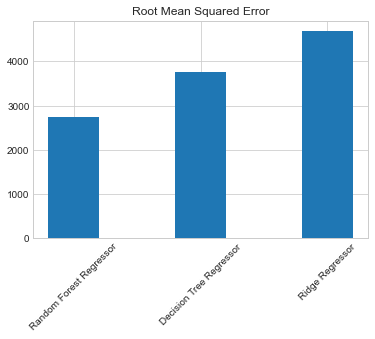

In [15]:
plt.bar(score.keys(), score.values(), width=0.4)
plt.xticks(rotation=45)
plt.title('Root Mean Squared Error');

So, we are getting good metrics value by using the `RandomForestRegressor` and `DecisionTreeRegressor`. We move forward with these two machine learning model and perform the hyperparameter tuning make this score more lower.

## 6. Hyperparameter Tuning
In this section, we perform the hyperparameter tuning on the `RandomForestRegressor` and the `DecisionTreeRegressor` to improve the score of the metrics. For this, we create the `Pipeline` using the `RandomizedSearchCV` and `GridSearchCV`.

### 6.1 RandomizedSearchCV

In [36]:
# create the hyperparameter grid

random_grid_rf = {
    "n_estimators": [100, 200, 500, 700, 1000],
    "max_features": ['auto', 'sqrt', 'log2', None],
}

random_grid_dt = {
    "splitter": ['best', 'random'],
    "max_depth": np.arange(0, 2, 0.1)
}

In [23]:
def rmse_scorer(y_preds, y_true=y_val):
    score = np.sqrt(mean_squared_error(y_true, y_preds))
    return score

rmse_score = make_scorer(rmse_scorer)

In [ ]:
random_model = RandomizedSearchCV(estimator=RandomForestRegressor(), 
                                  param_distributions=random_grid_rf,
                                  cv=5, 
                                  verbose=True, 
                                  n_jobs=-1,
                                  scoring=rmse_score
                                 )

random_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Gender_F,Gender_M
178247,1003576,2228,5,7,2,3,1,1,0,1
196647,1000342,1305,7,12,3,2,0,5,0,1
418590,1004386,2782,3,5,2,4,0,8,0,1
408727,1002931,2631,7,4,2,1,0,8,0,1
216416,1003434,485,7,4,2,4,0,1,0,1
